In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import make_regression

In [3]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)


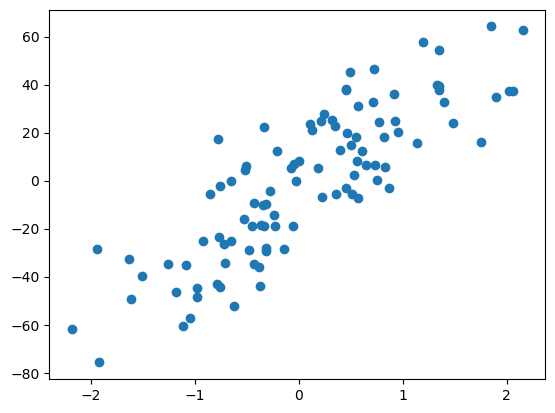

In [4]:
plt.scatter(x,y)

In [5]:
x.shape

(100, 1)

In [6]:
y.shape

(100,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [9]:
x_test.ravel().shape

(20,)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.coef_

array([28.16404017])

In [14]:
lr.intercept_

np.float64(-2.7130725669241036)

In [15]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6186926408914154

### using gradient descent when slope is constant ###

In [16]:
m = lr.coef_[0]

In [17]:
m

np.float64(28.164040171229406)

In [18]:
def gd(epochs,b,x,y,lr):
    plt.figure(figsize=(10,8))
    plt.scatter(x,y,label="Data points")
    for i in range(epochs):
        loss_slope_b = -2*np.sum(y - m*x.ravel() - b)
        b = b-lr*loss_slope_b
        y_pred2 = m*(x_test.ravel())+b
        print(f"updated value of b is {b}")
        plt.plot(x_test,y_pred2,color="orange")
    plt.plot(x_test,y_pred,color="black")
    plt.legend()
    plt.show()
    

updated value of b is -124.34091610707856
updated value of b is 70.26363355716859
updated value of b is -46.49909624137973
updated value of b is 23.558541637749272
updated value of b is -18.476041089728135
updated value of b is 6.744708546758318
updated value of b is -8.387741235133555
updated value of b is 0.6917286340015671
updated value of b is -4.755953287479504
updated value of b is -1.487344134590864
updated value of b is -3.448509626324047
updated value of b is -2.2718103312841373
updated value of b is -2.977829908308083
updated value of b is -2.554218162093715
updated value of b is -2.808385209822336
updated value of b is -2.655884981185162
updated value of b is -2.7473851183674687
updated value of b is -2.6924850360580845
updated value of b is -2.7254250854437143
updated value of b is -2.7056610558123366
updated value of b is -2.7175194735911634
updated value of b is -2.7104044229238666
updated value of b is -2.7146734533242456
updated value of b is -2.712112035084018
updated 

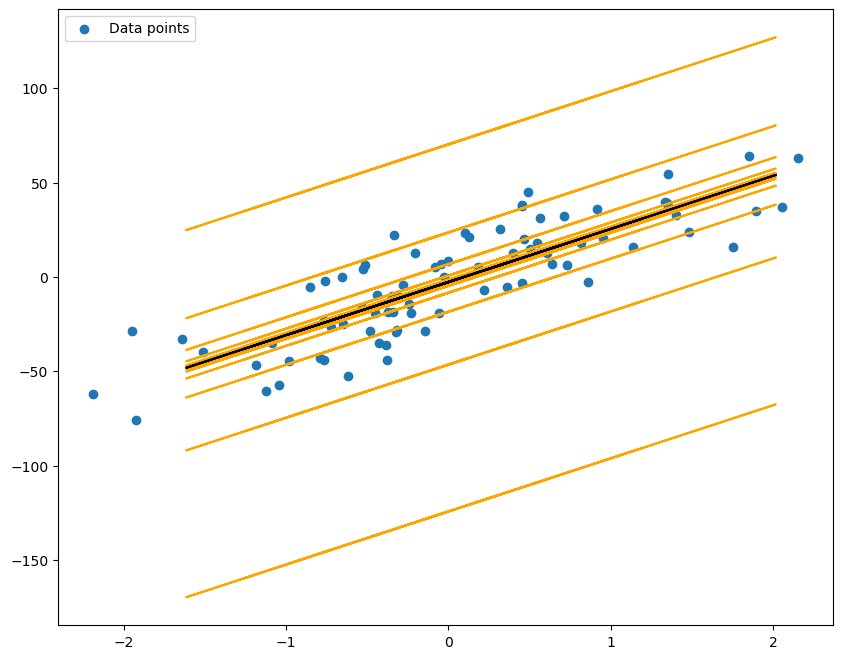

In [19]:
gd(100,200,x_train,y_train,0.01)

### you can see in the graph that the intercept converges to near about -2.7 and that indeed is the value stated in the linear regression line ###

## making intercept constant and using gradient descent on the slope ##

In [20]:
def gd2(epochs,slope,x,y,lr,b):
    plt.figure(figsize=(10,8))
    plt.scatter(x,y,label="Data points")
    plt.plot(x_test,y_pred,color="black")
    for i in range(epochs):
        loss_slope_m = -2*np.sum((y-slope*x.ravel()-b)*x.ravel())
        slope = slope - lr*loss_slope_m
        y_pred2 = slope*x_test.ravel()-b
        print(f"value of updated slope is {slope}")
        plt.plot(x_test.ravel(),y_pred2,color="green")
    plt.show()

value of updated slope is 37.406381225482164
value of updated slope is 24.47639036870396
value of updated slope is 29.63539477567876
value of updated slope is 27.576976733006052
value of updated slope is 28.398275670582485
value of updated slope is 28.070581329160785
value of updated slope is 28.201329801473047
value of updated slope is 28.149161787409017
value of updated slope is 28.16997657509453
value of updated slope is 28.1616715745273
value of updated slope is 28.164985229966106
value of updated slope is 28.163663097321052
value of updated slope is 28.16419062191237
value of updated slope is 28.16398014212769
value of updated slope is 28.164064122553413
value of updated slope is 28.164030614765885
value of updated slope is 28.16404398421258
value of updated slope is 28.164038649867397
value of updated slope is 28.164040778245568
value of updated slope is 28.164039929032874
value of updated slope is 28.16404026786467
value of updated slope is 28.164040132672408
value of updated sl

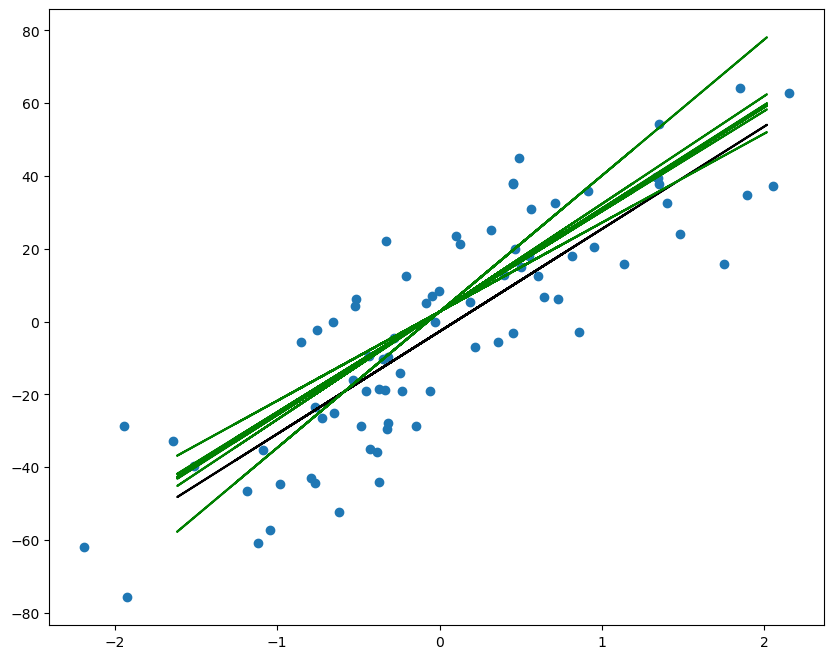

In [21]:
gd2(100,5,x_train,y_train,0.01,lr.intercept_)

### you can see that the slope also converges to the real value of the slope from the linear regression line ###

## using gradient descent when both the slope and the intercept is unknown ##

In [22]:
class GDregressor:
    def __init__(self,learning_rate,epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self,x,y):
        self.coef_ = 0
        self.intercept_ = 1
        for i in range(self.epochs):
            loss_slope_m = -2*np.sum((y-self.coef_*x.ravel()-self.intercept_)*x.ravel())
            loss_slope_b = -2*np.sum(y-self.coef_*x.ravel()-self.intercept_)

            self.coef_ = self.coef_- self.lr*loss_slope_m
            self.intercept_ = self.intercept_ - self.lr*loss_slope_b
    def predict(self,x):
        return self.coef_*x.ravel()+self.intercept_

In [23]:
gd = GDregressor(0.01,1000)

In [24]:
gd.fit(x_train,y_train)

In [25]:
gd.intercept_

np.float64(-2.713072566924104)

In [26]:
gd.coef_

np.float64(28.164040171229413)

In [27]:
lr.intercept_

np.float64(-2.7130725669241036)

In [28]:
lr.coef_

array([28.16404017])

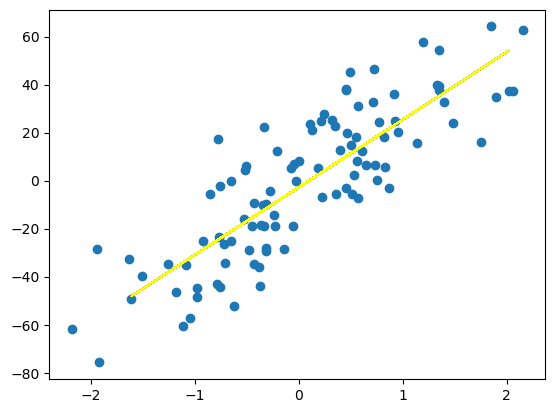

In [29]:
plt.plot(x_test,y_pred,color="black",label="linear regression line")
plt.plot(x_test,gd.predict(x_test),label="gradient descent line", color="yellow")
plt.scatter(x,y,label="Data points")

You can see the lines have basically overlapped meaning, gradient descent and linear regression have same intercept as well as same slope

#Gradient Descent for n dimensional data#

In [30]:
x,y = make_regression(n_samples=100, n_features=4, n_informative=1, n_targets=1,noise=20,random_state=13)


In [31]:
x.shape

(100, 4)

In [32]:
y.shape

(100,)

In [33]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [34]:
x_train.shape

(80, 4)

### Defining our own gradient descent class ###

In [35]:
class batchGD:

    def __init__(self,learning_rate,epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self,x,y):
        self.intercept_ = 0
        self.coef_ = np.ones(x.shape[1])
        for i in range(self.epochs):
            y_hat = self.intercept_ + np.dot(x,self.coef_)
            intercept_der = -1*np.mean(y-y_hat)
            coef_der = -1*np.dot(x.T, (y - y_hat))

            self.intercept_ = self.intercept_ - (self.lr*intercept_der)
            self.coef_ = self.coef_ - (self.lr*coef_der)

    def predict(self,x):
        return np.dot(self.coef_,x)+self.intercept_

### using sklearns Batch gradient ###

In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1, tol=None, random_state=42, eta0=0.01, learning_rate='constant', penalty=None, shuffle=False)

In [37]:
def batchRegressor(epochs,x_train,y_train):
    for i in range(epochs):
        sgd_reg.partial_fit(x_train,y_train)

In [38]:
batchRegressor(10000,x_train,y_train)

In [39]:
batch = batchGD(0.01,10000)

In [40]:
batch.fit(x_train,y_train)

In [41]:
sgd_reg.intercept_

array([2.50399853])

In [42]:
sgd_reg.coef_

array([95.72048838, -1.67577697, -0.48810396, -0.85437836])

In [43]:
batch.intercept_

np.float64(2.722339354830375)

In [44]:
batch.coef_

array([95.95965297, -1.88647563, -0.43303947, -0.36289122])

### 